## Advanced indexing techniques

NumPy offers many indexing facilities not available in regular Python sequences.  
* Indexing with **arrays of indices**
* Indexing by arrays of booleans.
* Indexing by strings (see [structured datatypes](https://docs.scipy.org/doc/numpy-1.16.1/user/basics.rec.html#structured-arrays))

### Indexing with arrays of indices

In [1]:
import numpy as np

a = np.arange(10)**2  # sqaure of 0, 1, 2, ....9
i = np.array([2, 2, 3, 5, 6, 4])

# Create an array using "a" as the base array, and "i" as index
print(a[i])

# You can also use an "index" with more than 1 dimension
j = np.array([[2,4],
             [3,6],
             [5,5]])
print(a[j])

[ 4  4  9 25 36 16]
[[ 4 16]
 [ 9 36]
 [25 25]]


When the base array is multidimensional, and the index array is one dimensional, each index number in the index array refers to a slice of the base array along the first dimension.

In [7]:
food = np.array([["cereal", "milk", "pancake"],
                ["banana", "apple", "orange"],
                ["guava", "berry", "tomato"],
                ["chicken", "sausage", "ham"],
                ["Broccoli", "napa", "cucumber"]])
fi = np.array([1,2])
vi = np.array([1,2,4])

fruit = food[fi]
vegetarian = food[vi]
print("foood", food)

print("fruit = ", fruit, fruit.shape, fruit[0])
print("vegetarian food = ", vegetarian)

foood [['cereal' 'milk' 'pancake']
 ['banana' 'apple' 'orange']
 ['guava' 'berry' 'tomato']
 ['chicken' 'sausage' 'ham']
 ['Broccoli' 'napa' 'cucumber']]
fruit =  [['banana' 'apple' 'orange']
 ['guava' 'berry' 'tomato']] (2, 3) ['banana' 'apple' 'orange']
vegetarian food =  [['banana' 'apple' 'orange']
 ['guava' 'berry' 'tomato']
 ['Broccoli' 'napa' 'cucumber']]


We can also use multiple index arrays, each one represents the index of one dimension, to index a multidimension base array.

In [18]:
print("food", food, food.shape)
# we will use "i" as the index for x axis
i = np.array([[0,1],
             [3,2]])
# we will use "j" as the index for y axis
j = np.array([[2,1],
             [1,2]])

print("food[i,j]", food[i,j], food[i,j].shape)

print("food[i]", food[i], food[i].shape)

print("safds",food[np.array([0,1])], food[np.array([0,1])].shape)

food [['cereal' 'milk' 'pancake']
 ['banana' 'apple' 'orange']
 ['guava' 'berry' 'tomato']
 ['chicken' 'sausage' 'ham']
 ['Broccoli' 'napa' 'cucumber']] (5, 3)
food[i,j] [['pancake' 'apple']
 ['sausage' 'tomato']] (2, 2)
food[i] [[['cereal' 'milk' 'pancake']
  ['banana' 'apple' 'orange']]

 [['chicken' 'sausage' 'ham']
  ['guava' 'berry' 'tomato']]] (2, 2, 3)
safds [['cereal' 'milk' 'pancake']
 ['banana' 'apple' 'orange']] (2, 3)


In [23]:

a= np.arange(12).reshape(3,4)
print("a: ", a)
i = np.array( [ [0,1],                        # indices for the first dim of a
                [1,2] ] )
j = np.array( [ [2,1],                        # indices for the second dim
                 [3,3] ] )
 
print("a[i,j]: ",a[i,j])	
 
print("a[i,2]: ",a[i,2])	
print("a[:,j]: ",a[:,j], a[:,j].shape)
print("a[i]", a[i], a[i].shape)


a:  [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
a[i,j]:  [[ 2  5]
 [ 7 11]]
a[i,2]:  [[ 2  6]
 [ 6 10]]
a[:,j]:  [[[ 2  1]
  [ 3  3]]

 [[ 6  5]
  [ 7  7]]

 [[10  9]
  [11 11]]] (3, 2, 2)
a[i] [[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 4  5  6  7]
  [ 8  9 10 11]]] (2, 2, 4)


In [0]:
# We can also do the following
coord = (i, j)
print(coord)
print(food[coord])

(array([[0, 1],
       [3, 2]]), array([[2, 1],
       [1, 2]]))
[['pancake' 'apple']
 ['sausage' 'tomato']]


#### Assignment using indexing

In [2]:
import numpy as np
a = np.arange(5)
print(a)
a[[3,4]] = 0
print(a)

a = np.arange(5)
a[[2,2,3]] = [7,8,9]
print(a)

[0 1 2 3 4]
[0 1 2 0 0]
[0 1 8 9 4]


### Indexing with boolean arrays

Boolean arrays we use must have the same shape as the base array.  Only the elements in the base array with corresponding value of True in the boolean are chosen.

In [3]:
a = np.arange(12)
b = (a%3==0)

print(a)
print(b)

print(a[b])

# We can even write even more secintly as
print(a[ a%3 == 0])

[ 0  1  2  3  4  5  6  7  8  9 10 11]
[ True False False  True False False  True False False  True False False]
[0 3 6 9]
[0 3 6 9]


#### A more powerful example

We can use boolean indexing to draw a Mandebrot set image.   The following example is drawn from the [Numpy 1.6.1 user guide](https://docs.scipy.org/doc/numpy-1.16.1/user/quickstart.html) .  

It is OK if the program is hard to understand for you for now.  You can just enjoy the powerfulness of NumPy.




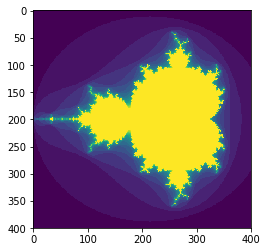

In [0]:
import numpy as np
import matplotlib.pyplot as plt
def mandelbrot( h,w, maxit=20 ):
    """Returns an image of the Mandelbrot fractal of size (h,w)."""
    y,x = np.ogrid[ -1.4:1.4:h*1j, -2:0.8:w*1j ]
    c = x+y*1j
    z = c
    divtime = maxit + np.zeros(z.shape, dtype=int)

    for i in range(maxit):
        z = z**2 + c
        diverge = z*np.conj(z) > 2**2            # who is diverging
        div_now = diverge & (divtime==maxit)  # who is diverging now
        divtime[div_now] = i                  # note when
        z[diverge] = 2                        # avoid diverging too much

    return divtime
plt.imshow(mandelbrot(400,400))
plt.show()

#### Selecting a slice using boolean index

In [22]:
food = np.array([["cereal", "milk", "pancake"],
                ["banana", "apple", "orange"],
                ["guava", "berry", "tomato"],
                ["chicken", "sausage", "ham"],
                ["Broccoli", "napa", "cucumber"]])

x_select = np.array([True, False, True, False, False])
y_select = np.array([True, False, True])

print(food[x_select, :])
print(food[x_select])
print(food[ : , y_select])

# If x_select and y_select have the same number of True, then we can also do the following.
# Numpy converts the boolean arrays to [0, 2],[0,2] (The position of True)
print(food[x_select, y_select])
print("fff",food[[0,2],[0,2]])

[['cereal' 'milk' 'pancake']
 ['guava' 'berry' 'tomato']]
[['cereal' 'milk' 'pancake']
 ['guava' 'berry' 'tomato']]
[['cereal' 'pancake']
 ['banana' 'orange']
 ['guava' 'tomato']
 ['chicken' 'ham']
 ['Broccoli' 'cucumber']]
['cereal' 'tomato']
fff ['cereal' 'tomato']
